In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("data.csv")
df.head()
df["final_result"] = df["final_result"].replace({"Distinction": "Pass"})
df = df[df["final_result"].isin(["Pass", "Fail"])]
df["final_result"].value_counts()
# Grouping the education levels together as No Formal Qualifications and Post Graduate Qualification have very low counts
# We can combine these with the closest education qualifications
df["highest_education"] = df["highest_education"].apply(
    lambda x: "HE Qualification"
    if x in ["HE Qualification", "Post Graduate Qualification"]
    else x
)
df["highest_education"] = df["highest_education"].apply(
    lambda x: "Lower Than A level"
    if x in ["Lower Than A Level", "No Formal quals"]
    else x
)

In [2]:
df = df.dropna()

In [3]:
print("length of df: ", len(df))

length of df:  20290


In [4]:
df = df.drop(['id_student','code_presentation','region','final_result','module_presentation','mark','total_score*weight','imd_band'],axis=1)

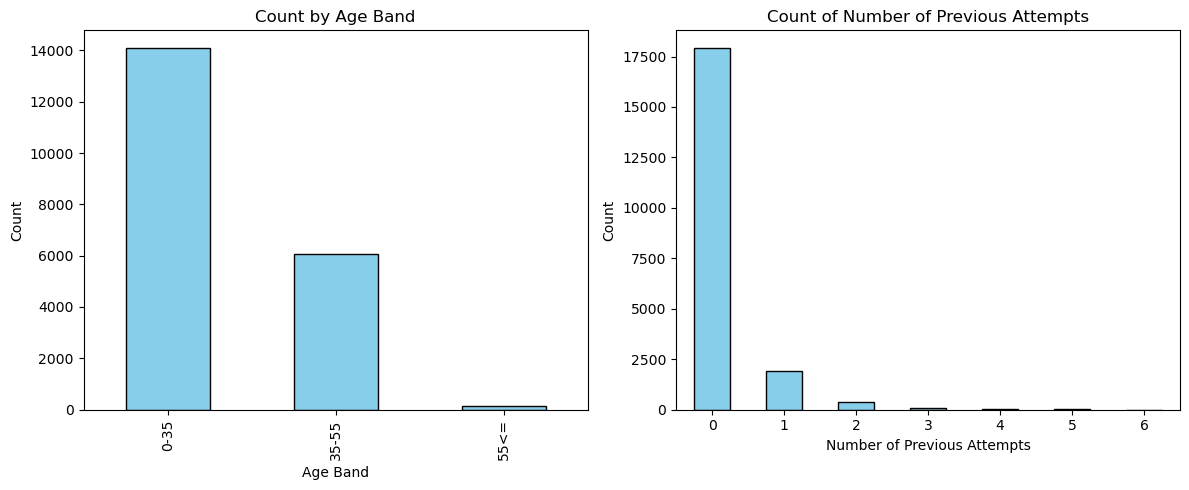

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for age_band
df['age_band'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Count by Age Band')
axes[0].set_xlabel('Age Band')
axes[0].set_ylabel('Count')

# Plot for num_of_prev_attempts
df['num_of_prev_attempts'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Count of Number of Previous Attempts')
axes[1].set_xlabel('Number of Previous Attempts')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(len(df['num_of_prev_attempts'].value_counts().sort_index())))
axes[1].set_xticklabels(df['num_of_prev_attempts'].value_counts().sort_index().index, rotation=0)

plt.tight_layout()
plt.show()

In [6]:
one_hot = pd.get_dummies(df['code_module'], prefix='code_module',drop_first=True)
df = pd.concat([one_hot, df], axis=1)

In [7]:
df = df.drop(['code_module'],axis=1)

In [8]:
## Sincle the count of the last age band is not very high we can combine it with the previous one
df['age_band'] = df['age_band'].apply(lambda x: '35-55' if x=='55<=' else x)

In [9]:
df['num_of_prev_attempts']= df['num_of_prev_attempts'].apply(lambda x: 1 if x>=1 else 0)

In [10]:
df.columns

Index(['code_module_BBB', 'code_module_CCC', 'code_module_DDD',
       'code_module_EEE', 'code_module_FFF', 'code_module_GGG',
       'attempted_weight', 'adjusted_mark', 'gender', 'highest_education',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability'],
      dtype='object')

In [11]:
df.dtypes

code_module_BBB            bool
code_module_CCC            bool
code_module_DDD            bool
code_module_EEE            bool
code_module_FFF            bool
code_module_GGG            bool
attempted_weight        float64
adjusted_mark           float64
gender                   object
highest_education        object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
dtype: object

In [12]:
ordinal_modules = ['attempted_weight','num_of_prev_attempts','studied_credits','adjusted_mark']

In [13]:
one_hot = pd.get_dummies(df['highest_education'], prefix='highest_education',drop_first=True)
df = pd.concat([one_hot, df], axis=1)
df = df.drop(['highest_education'],axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scale_dict = {}
for col in ordinal_modules:
    scale_dict[col] = MinMaxScaler()
    df[col] = scale_dict[col].fit_transform(df[[col]])

In [16]:
df.loc[:,'gender'] = df['gender'].apply(lambda x: 1 if x=='M' else 0)
df.loc[:,'disability'] = df['disability'].apply(lambda x: 1 if x=='Y' else 0)
df.loc[:,'age_band'] = df['age_band'].apply(lambda x: 0 if x=='0-35' else 1)

In [17]:
X = df.drop(['adjusted_mark'], axis=1)
y = df['adjusted_mark']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
X_train

,highest_education_HE Qualification,highest_education_Lower Than A level,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,attempted_weight,gender,age_band,num_of_prev_attempts,studied_credits,disability
243,True,False,False,False,True,False,False,False,0.3000,1,0,0.0,0.05,0
1386,False,False,True,False,False,False,False,False,0.5000,1,1,0.0,0.15,0
12601,False,True,False,False,True,False,False,False,1.0000,1,0,0.0,0.05,0
12425,False,True,False,False,False,False,True,False,0.0625,1,0,0.0,0.05,0
14796,False,False,False,False,False,True,False,False,0.5000,1,0,0.0,0.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14345,False,True,True,False,False,False,False,False,0.5000,0,1,0.0,0.15,0
15207,True,False,False,False,False,False,False,False,0.1500,1,1,0.0,0.05,0
6895,False,False,False,False,False,False,True,False,0.5000,1,0,0.0,0.05,0
1122,False,False,False,False,False,False,True,False,0.5000,1,1,0.0,0.05,0


In [28]:
from sklearn.linear_model import Ridge

In [29]:
model1= Ridge(alpha=1e-3)
model2 = Ridge(alpha=1)
model3 = Ridge(1e3)

In [30]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

Ridge(alpha=1000.0)

In [31]:
print("Train Score:", model1.score(X_train, y_train))
print("Validation Score:", model1.score(X_val, y_val))
print("Test Score:", model1.score(X_test, y_test))

Train Score: 0.592890052628146
Validation Score: 0.6202748211690085
Test Score: 0.5725966554079291


In [32]:
print("Train Score:", model2.score(X_train, y_train))
print("Validation Score:", model2.score(X_val, y_val))
print("Test Score:", model2.score(X_test, y_test))

Train Score: 0.5928882806190601
Validation Score: 0.6202600606959633
Test Score: 0.5726047018722278


In [33]:
print("Train Score:", model3.score(X_train, y_train))
print("Validation Score:", model3.score(X_val, y_val))
print("Test Score:", model3.score(X_test, y_test))

Train Score: 0.3852128611954999
Validation Score: 0.40394219032625045
Test Score: 0.3682953915316338
